
# smooth signals 

### this is a sample Notebook that shows how to smooth signals obtained using the querys mentioned in get_data_single_state.ipynb

#### the Notebook illustrates how to smooth signals for a single state 

**1) data for states **


the **Target** is to smooth the signals of a pandas DataFrame obtained with get_data_single_state.ipynb that contains the columns

*********************************************************************

Away from Home 6hr+ (SG),

Away from Home 3-6hr (SG),

Search Trends (Google),

Doctor Visits,

Symptoms (FB),

Symptoms in Community (FB),

Combined,

COVID-19 Antigen Tests (Quidel),

Hospital Admissions,

Cases,

Deaths

***********************************************************************



In [1]:
path = '/media/flor/ce9d3b3b-3afb-4b6d-a765-a6c5eeadffe0/flor/Pandemov/challenge/CMU/mapa/data/github/'

In [2]:
import pandas as pd
import numpy as np
import csaps

**********************************************************************************************
we read the '.csv' from our local
**************************************************************************************************

In [6]:
df = pd.read_csv(path+'oh.csv')

*********************************************
we verify this the pandas DataFrames we need
****************************************

In [7]:
df.head()

,Unnamed: 0,time_value,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,stderr_smoothed_search,...,sample_size_covid_ag_smoothed_pct_positive,smoothed_adj_covid19,stderr_smoothed_adj_covid19,sample_size_smoothed_adj_covid19,confirmed_7dav_incidence_num,stderr_confirmed_7dav_incidence_num,sample_size_confirmed_7dav_incidence_num,deaths_7dav_incidence_num,stderr_deaths_7dav_incidence_num,sample_size_deaths_7dav_incidence_num
0,0,2020-03-04,0.094011,0.000553,9220.0,0.110742,0.000582,9220.0,8.370803,NaN,...,NaN,0.023816,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,1,2020-03-05,0.090383,0.000537,9225.0,0.113740,0.000577,9225.0,10.089689,NaN,...,NaN,0.032358,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,2,2020-03-06,0.077313,0.000491,9225.0,0.101803,0.000546,9225.0,9.602428,NaN,...,NaN,0.031611,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
3,3,2020-03-07,0.028089,0.000220,9222.0,0.062543,0.000365,9222.0,10.705053,NaN,...,NaN,0.031418,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,4,2020-03-08,0.024239,0.000206,9225.0,0.054198,0.000358,9225.0,10.503644,NaN,...,NaN,0.032832,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


In [8]:
df.describe()

,Unnamed: 0,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,stderr_smoothed_search,sample_size_smoothed_search,...,sample_size_covid_ag_smoothed_pct_positive,smoothed_adj_covid19,stderr_smoothed_adj_covid19,sample_size_smoothed_adj_covid19,confirmed_7dav_incidence_num,stderr_confirmed_7dav_incidence_num,sample_size_confirmed_7dav_incidence_num,deaths_7dav_incidence_num,stderr_deaths_7dav_incidence_num,sample_size_deaths_7dav_incidence_num
count,216.000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,209.000000,0.0,0.0,...,108.000000,208.000000,0.0,0.0,216.000000,0.0,0.0,216.000000,0.0,0.0
mean,107.500,0.042837,0.000311,9209.859155,0.067160,0.000411,9209.859155,15.878323,NaN,NaN,...,1692.046296,4.903639,NaN,NaN,724.856481,NaN,NaN,22.640212,NaN,NaN
std,62.498,0.015595,0.000081,6.359429,0.018401,0.000077,6.359429,9.818072,NaN,NaN,...,775.992224,1.937851,NaN,NaN,400.309640,NaN,NaN,12.209234,NaN,NaN
min,0.000,0.020323,0.000152,9196.000000,0.031652,0.000225,9196.000000,0.000000,NaN,NaN,...,176.000000,0.023816,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,53.750,0.029520,0.000260,9205.000000,0.054003,0.000359,9205.000000,9.602428,NaN,NaN,...,1107.250000,4.134143,NaN,NaN,421.392857,NaN,NaN,17.142857,NaN,NaN
50%,107.500,0.041439,0.000295,9209.000000,0.064052,0.000401,9209.000000,14.239559,NaN,NaN,...,1782.000000,5.335548,NaN,NaN,705.642857,NaN,NaN,21.714286,NaN,NaN
75%,161.250,0.048858,0.000350,9214.000000,0.079829,0.000464,9214.000000,17.992100,NaN,NaN,...,2176.000000,6.412608,NaN,NaN,1067.000000,NaN,NaN,29.500000,NaN,NaN
max,215.000,0.109061,0.000643,9225.000000,0.125060,0.000649,9225.000000,48.519127,NaN,NaN,...,3372.000000,7.796428,NaN,NaN,1372.571429,NaN,NaN,48.714286,NaN,NaN


********************************************************************
we choose a column we consider to be significant for the analysis, the one that correspond to Symptoms in Community (FB)
*******************************************************************

In [9]:
column = 'smoothed_hh_cmnty_cli'

**************************************************
how does this columns looks like?
***************************************************

In [10]:
df.smoothed_hh_cmnty_cli.describe()

count    174.000000
mean      17.953269
std        2.689529
min       12.791672
25%       16.020893
50%       18.169282
75%       20.290422
max       22.523592
Name: smoothed_hh_cmnty_cli, dtype: float64

*****************************************************
we print here all the columns for clarity
*******************************************

In [11]:
df.columns

Index(['Unnamed: 0', 'time_value', 'full_time_work_prop',
       'stderr_full_time_work_prop', 'sample_size_full_time_work_prop',
       'part_time_work_prop', 'stderr_part_time_work_prop',
       'sample_size_part_time_work_prop', 'smoothed_search',
       'stderr_smoothed_search', 'sample_size_smoothed_search',
       'smoothed_adj_cli', 'stderr_smoothed_adj_cli',
       'sample_size_smoothed_adj_cli', 'smoothed_cli', 'stderr_smoothed_cli',
       'sample_size_smoothed_cli', 'smoothed_hh_cmnty_cli',
       'stderr_smoothed_hh_cmnty_cli', 'sample_size_smoothed_hh_cmnty_cli',
       'nmf_day_doc_fbc_fbs_ght', 'stderr_nmf_day_doc_fbc_fbs_ght',
       'sample_size_nmf_day_doc_fbc_fbs_ght', 'covid_ag_smoothed_pct_positive',
       'stderr_covid_ag_smoothed_pct_positive',
       'sample_size_covid_ag_smoothed_pct_positive', 'smoothed_adj_covid19',
       'stderr_smoothed_adj_covid19', 'sample_size_smoothed_adj_covid19',
       'confirmed_7dav_incidence_num', 'stderr_confirmed_7dav_incidenc

**********************************************************
since we are reading a DataFrame from local, we need pandas to recognize that time_value is a date
**********************************************************

In [12]:
df['time_value'] = pd.to_datetime(df.time_value)

*************************************
do we have null values?
********************************************

In [13]:
df.isna().sum()

Unnamed: 0                                      0
time_value                                      0
full_time_work_prop                             3
stderr_full_time_work_prop                      3
sample_size_full_time_work_prop                 3
part_time_work_prop                             3
stderr_part_time_work_prop                      3
sample_size_part_time_work_prop                 3
smoothed_search                                 7
stderr_smoothed_search                        216
sample_size_smoothed_search                   216
smoothed_adj_cli                                2
stderr_smoothed_adj_cli                       216
sample_size_smoothed_adj_cli                  216
smoothed_cli                                   33
stderr_smoothed_cli                            33
sample_size_smoothed_cli                       33
smoothed_hh_cmnty_cli                          42
stderr_smoothed_hh_cmnty_cli                   42
sample_size_smoothed_hh_cmnty_cli              42


**********************************************
yes, we will need to drop some columns. how about our column of interest?  
******************************************

In [14]:
df[column].isna().sum()

42

*********************************************
let's find out our first not null value
**********************************************

In [15]:
np.where(df[column].notna().values==True)[0][0]

42

******************************
since the first not null value of our column of interest is in index 73, we will start our DataFrame from there, the *first_time* index
****************************

In [16]:
first_time = np.where(df[column].notna().values==True)[0][0]


In [17]:
newDF = df.loc[df['time_value']>df['time_value'][first_time]]

In [18]:
newDF

,Unnamed: 0,time_value,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,stderr_smoothed_search,...,sample_size_covid_ag_smoothed_pct_positive,smoothed_adj_covid19,stderr_smoothed_adj_covid19,sample_size_smoothed_adj_covid19,confirmed_7dav_incidence_num,stderr_confirmed_7dav_incidence_num,sample_size_confirmed_7dav_incidence_num,deaths_7dav_incidence_num,stderr_deaths_7dav_incidence_num,sample_size_deaths_7dav_incidence_num
43,43,2020-04-16,0.041828,0.000304,9213.0,0.055476,0.000372,9213.0,17.122565,NaN,...,NaN,5.735752,NaN,NaN,414.000000,NaN,NaN,25.142857,NaN,NaN
44,44,2020-04-17,0.041459,0.000348,9212.0,0.055604,0.000404,9212.0,12.673587,NaN,...,NaN,5.761485,NaN,NaN,461.285714,NaN,NaN,26.714286,NaN,NaN
45,45,2020-04-18,0.026292,0.000217,9210.0,0.037350,0.000275,9210.0,11.764859,NaN,...,NaN,5.693369,NaN,NaN,566.285714,NaN,NaN,29.142857,NaN,NaN
46,46,2020-04-19,0.028494,0.000260,9212.0,0.038316,0.000309,9212.0,9.575618,NaN,...,NaN,5.860164,NaN,NaN,709.428571,NaN,NaN,31.142857,NaN,NaN
47,47,2020-04-20,0.037371,0.000278,9220.0,0.051551,0.000340,9220.0,10.859135,NaN,...,NaN,5.839389,NaN,NaN,849.000000,NaN,NaN,36.571429,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,2020-10-01,0.073260,0.000491,9209.0,0.102338,0.000578,9209.0,13.351452,NaN,...,3372.0,NaN,NaN,NaN,1081.571429,NaN,NaN,14.285714,NaN,NaN
212,212,2020-10-02,0.061681,0.000416,9212.0,0.091134,0.000516,9212.0,4.533739,NaN,...,NaN,NaN,NaN,NaN,1130.571429,NaN,NaN,24.428571,NaN,NaN
213,213,2020-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1136.857143,NaN,NaN,26.428571,NaN,NaN
214,214,2020-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1157.142857,NaN,NaN,26.285714,NaN,NaN


In [19]:
newDF[column].isna().sum()

0

************************************
we could have null values in the end. let's find out our last not null value, our *last_time* index
*******************************************

In [20]:
last_time = np.where(df[column].notna().values==True)[0][-1]

In [21]:
last_time

215

*****************************************************
let's consider only values after first_time index and before last_time index
****************************************

In [22]:
newDF = df.loc[df['time_value']>df['time_value'][first_time]].loc[df['time_value']<df['time_value'][last_time]]

In [23]:
newDF

,Unnamed: 0,time_value,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,stderr_smoothed_search,...,sample_size_covid_ag_smoothed_pct_positive,smoothed_adj_covid19,stderr_smoothed_adj_covid19,sample_size_smoothed_adj_covid19,confirmed_7dav_incidence_num,stderr_confirmed_7dav_incidence_num,sample_size_confirmed_7dav_incidence_num,deaths_7dav_incidence_num,stderr_deaths_7dav_incidence_num,sample_size_deaths_7dav_incidence_num
43,43,2020-04-16,0.041828,0.000304,9213.0,0.055476,0.000372,9213.0,17.122565,NaN,...,NaN,5.735752,NaN,NaN,414.000000,NaN,NaN,25.142857,NaN,NaN
44,44,2020-04-17,0.041459,0.000348,9212.0,0.055604,0.000404,9212.0,12.673587,NaN,...,NaN,5.761485,NaN,NaN,461.285714,NaN,NaN,26.714286,NaN,NaN
45,45,2020-04-18,0.026292,0.000217,9210.0,0.037350,0.000275,9210.0,11.764859,NaN,...,NaN,5.693369,NaN,NaN,566.285714,NaN,NaN,29.142857,NaN,NaN
46,46,2020-04-19,0.028494,0.000260,9212.0,0.038316,0.000309,9212.0,9.575618,NaN,...,NaN,5.860164,NaN,NaN,709.428571,NaN,NaN,31.142857,NaN,NaN
47,47,2020-04-20,0.037371,0.000278,9220.0,0.051551,0.000340,9220.0,10.859135,NaN,...,NaN,5.839389,NaN,NaN,849.000000,NaN,NaN,36.571429,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,2020-09-30,0.064341,0.000416,9212.0,0.093204,0.000524,9212.0,13.397134,NaN,...,3135.0,NaN,NaN,NaN,1033.571429,NaN,NaN,16.714286,NaN,NaN
211,211,2020-10-01,0.073260,0.000491,9209.0,0.102338,0.000578,9209.0,13.351452,NaN,...,3372.0,NaN,NaN,NaN,1081.571429,NaN,NaN,14.285714,NaN,NaN
212,212,2020-10-02,0.061681,0.000416,9212.0,0.091134,0.000516,9212.0,4.533739,NaN,...,NaN,NaN,NaN,NaN,1130.571429,NaN,NaN,24.428571,NaN,NaN
213,213,2020-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1136.857143,NaN,NaN,26.428571,NaN,NaN


In [24]:
df.columns

Index(['Unnamed: 0', 'time_value', 'full_time_work_prop',
       'stderr_full_time_work_prop', 'sample_size_full_time_work_prop',
       'part_time_work_prop', 'stderr_part_time_work_prop',
       'sample_size_part_time_work_prop', 'smoothed_search',
       'stderr_smoothed_search', 'sample_size_smoothed_search',
       'smoothed_adj_cli', 'stderr_smoothed_adj_cli',
       'sample_size_smoothed_adj_cli', 'smoothed_cli', 'stderr_smoothed_cli',
       'sample_size_smoothed_cli', 'smoothed_hh_cmnty_cli',
       'stderr_smoothed_hh_cmnty_cli', 'sample_size_smoothed_hh_cmnty_cli',
       'nmf_day_doc_fbc_fbs_ght', 'stderr_nmf_day_doc_fbc_fbs_ght',
       'sample_size_nmf_day_doc_fbc_fbs_ght', 'covid_ag_smoothed_pct_positive',
       'stderr_covid_ag_smoothed_pct_positive',
       'sample_size_covid_ag_smoothed_pct_positive', 'smoothed_adj_covid19',
       'stderr_smoothed_adj_covid19', 'sample_size_smoothed_adj_covid19',
       'confirmed_7dav_incidence_num', 'stderr_confirmed_7dav_incidenc

In [25]:
df.smoothed_hh_cmnty_cli

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
211    18.140347
212    18.604531
213    19.088019
214    19.539719
215    20.263770
Name: smoothed_hh_cmnty_cli, Length: 216, dtype: float64

******************************
we will create 2 custom columns for our analysis
******************************

In [26]:
newDF['fbf_mas'] = df.smoothed_hh_cmnty_cli +  df.stderr_smoothed_hh_cmnty_cli
newDF['fbf_men'] = df.smoothed_hh_cmnty_cli -  df.stderr_smoothed_hh_cmnty_cli

********************************
we will make it short to start testing
********************************

In [27]:
newDFsmShort = newDF[['time_value', 'smoothed_hh_cmnty_cli', 'stderr_smoothed_hh_cmnty_cli', 'fbf_mas', 'fbf_men', 'confirmed_7dav_incidence_num', 'deaths_7dav_incidence_num']]

In [28]:
newDFsmShort.reset_index(inplace=True)

In [29]:
newDFsmShort

,index,time_value,smoothed_hh_cmnty_cli,stderr_smoothed_hh_cmnty_cli,fbf_mas,fbf_men,confirmed_7dav_incidence_num,deaths_7dav_incidence_num
0,43,2020-04-16,21.840372,0.655649,22.496021,21.184723,414.000000,25.142857
1,44,2020-04-17,22.074185,0.547380,22.621565,21.526804,461.285714,26.714286
2,45,2020-04-18,21.801290,0.473999,22.275289,21.327292,566.285714,29.142857
3,46,2020-04-19,21.704044,0.418061,22.122105,21.285983,709.428571,31.142857
4,47,2020-04-20,21.604655,0.378123,21.982778,21.226532,849.000000,36.571429
...,...,...,...,...,...,...,...,...
167,210,2020-09-30,18.467015,0.388808,18.855823,18.078207,1033.571429,16.714286
168,211,2020-10-01,18.140347,0.385854,18.526201,17.754493,1081.571429,14.285714
169,212,2020-10-02,18.604531,0.388116,18.992647,18.216415,1130.571429,24.428571
170,213,2020-10-03,19.088019,0.391510,19.479528,18.696509,1136.857143,26.428571


******************************
we will create a column that will help us smooth the data
********************************

In [31]:
newDFsmShort['days'] = np.arange(172)

<ipython-input-31-e0c61dbaef8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDFsmShort['days'] = np.arange(172)


In [32]:
newDFsmShort['days'] 

0        0
1        1
2        2
3        3
4        4
      ... 
167    167
168    168
169    169
170    170
171    171
Name: days, Length: 172, dtype: int64

*****************************
we use cubic spline interpolation with 2 different smooths to start testing
*************************************

In [35]:
for c in newDFsmShort.columns[1:]:
    if newDFsmShort[c].isna().sum()<50:
        x = newDFsmShort.days[newDFsmShort[c].notna()].values
        y = newDFsmShort[c][newDFsmShort[c].notna()].values

        sp = csaps.CubicSmoothingSpline(x, y, smooth=0.85)

        xs = newDFsmShort.days.values
        ys = sp(xs)

        newDFsmShort[c + '_smooth1'] = ys

        sp = csaps.CubicSmoothingSpline(x, y, smooth=0.3)
        ys = sp(xs)

        newDFsmShort[c + '_smooth2'] = ys
        newDFsmShort.to_csv(path+'_sm_oh.csv')


<ipython-input-35-757538df5091>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDFsmShort[c + '_smooth1'] = ys
<ipython-input-35-757538df5091>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDFsmShort[c + '_smooth2'] = ys


*************************************************
let's test our smooth on our column of interest
***************************************************


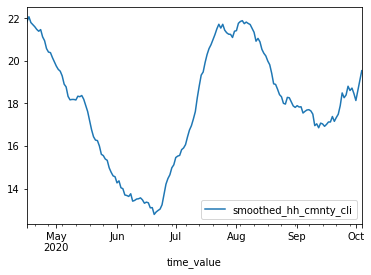

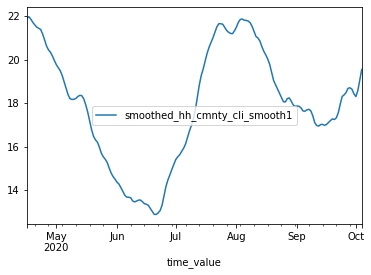

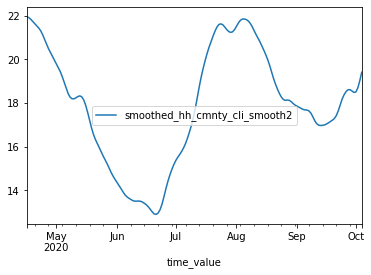

In [37]:
newDFsmShort.plot(x='time_value', y='smoothed_hh_cmnty_cli') 
newDFsmShort.plot(x='time_value', y='smoothed_hh_cmnty_cli_smooth1') 
newDFsmShort.plot(x='time_value', y='smoothed_hh_cmnty_cli_smooth2') 
